In [49]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import sqrt
from pandas import read_csv


In [50]:
data = pd.read_csv('CocaCola_Sales_Rawdata.csv')

In [51]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [52]:
data.shape

(42, 2)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [54]:
data.isnull().sum()


Quarter    0
Sales      0
dtype: int64

In [55]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [56]:
data.nunique()

Quarter    42
Sales      42
dtype: int64

In [57]:
data[data.duplicated()].shape


(0, 2)

In [58]:
data[data.duplicated()]


,Quarter,Sales


In [59]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [60]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [61]:
data

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [62]:
data['Date'] = (
    pd.to_datetime(
        data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

In [63]:
data

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [64]:
data['Quarters'] = 0

for i in range(42):
    n = data['Quarter'][i]
    data['Quarters'][i] = n[0:2]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25420\3235627804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i] = n[0:2]


In [65]:
data

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [66]:
dummy = pd.DataFrame(pd.get_dummies(data['Quarters']))

In [67]:
data1 = pd.concat((data, dummy), axis=1)


In [68]:
data1

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [69]:
data1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)

In [70]:
data1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [71]:
data1.set_index('Date',inplace=True)

In [72]:
data1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [73]:
data1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


In [74]:
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")

In [75]:
data["month"] = data.Date.dt.strftime("%b")
data["year"] = data.Date.dt.strftime("%Y")

In [76]:
data.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987


# VISUALIZATION

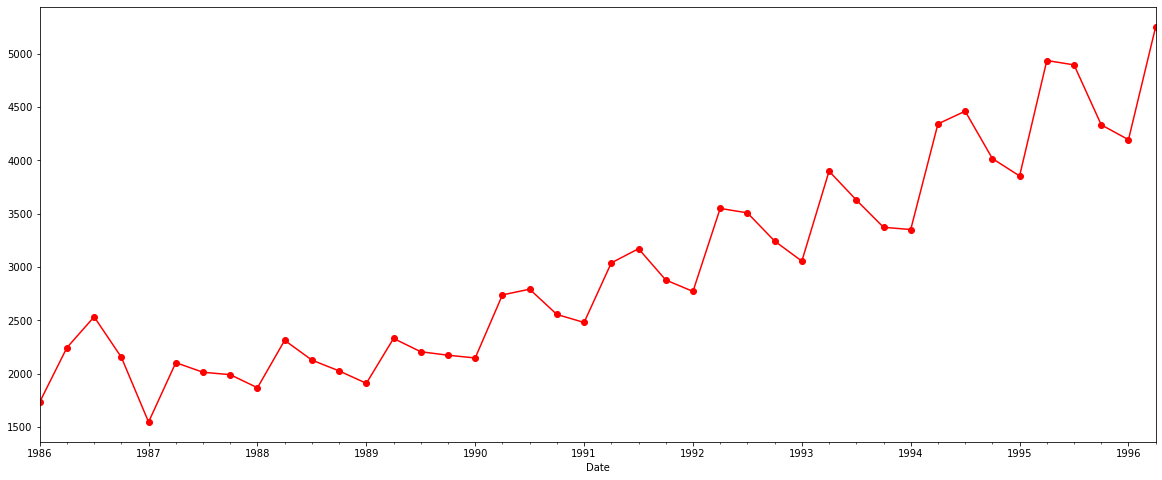

In [77]:
data1['Sales'].plot(figsize=(20, 8),color='red',marker='o');

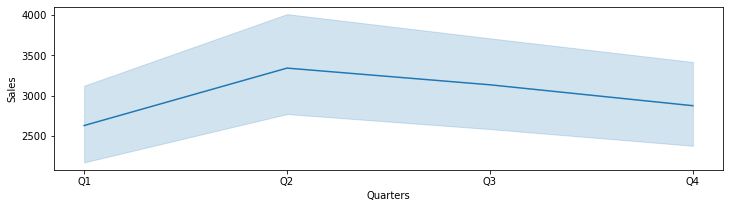

In [78]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarters", y="Sales", data=data);

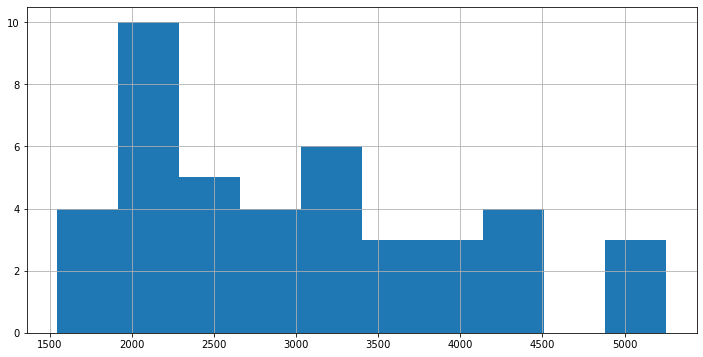

In [79]:
data.Sales.hist(figsize=(12,6));

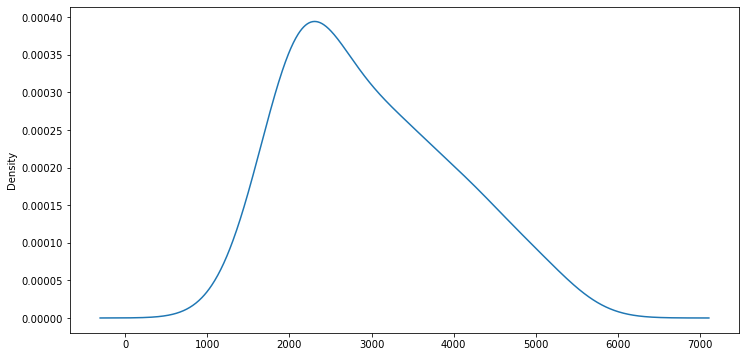

In [80]:
data.Sales.plot(kind='kde', figsize=(12,6));

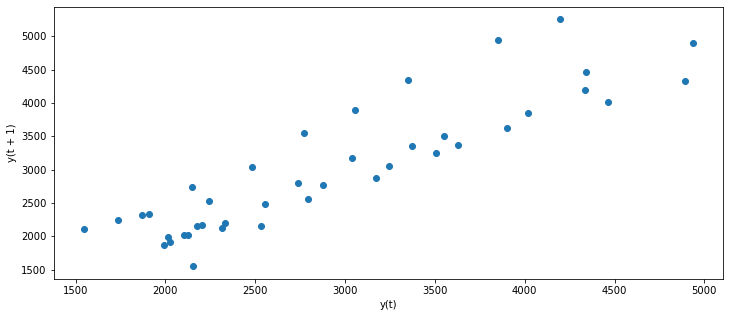

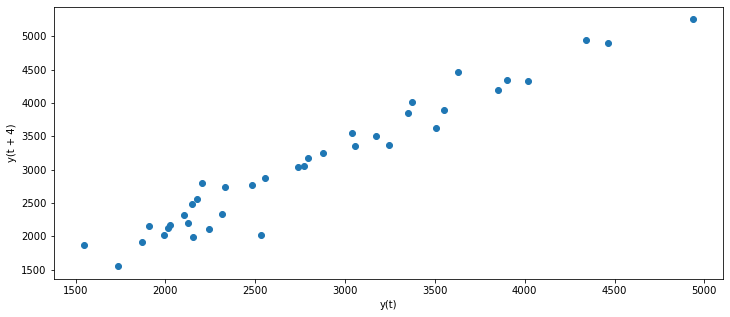

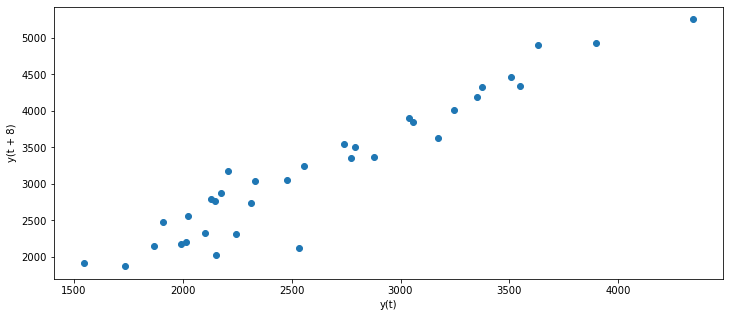

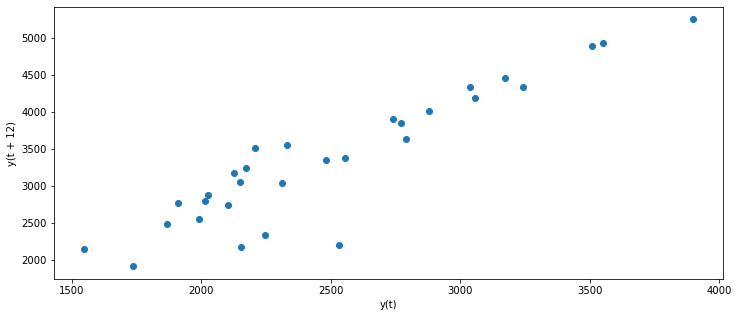

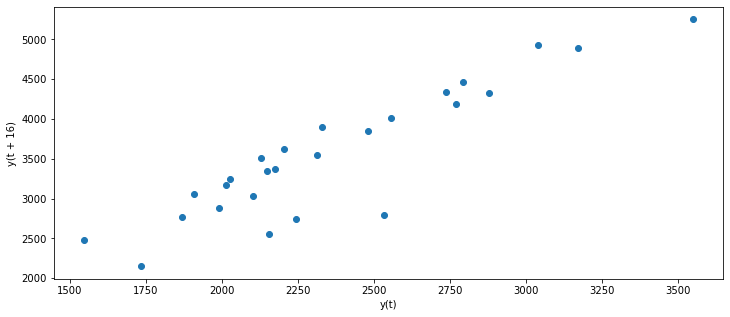

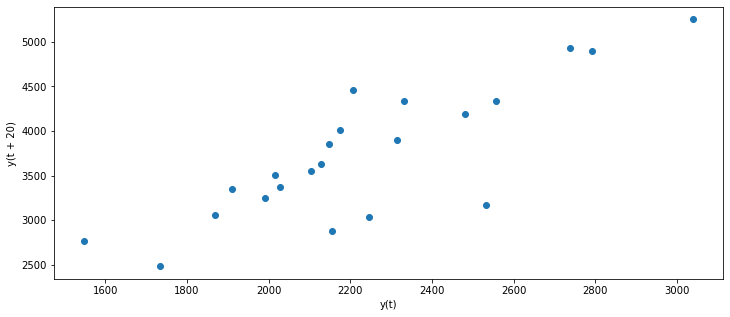

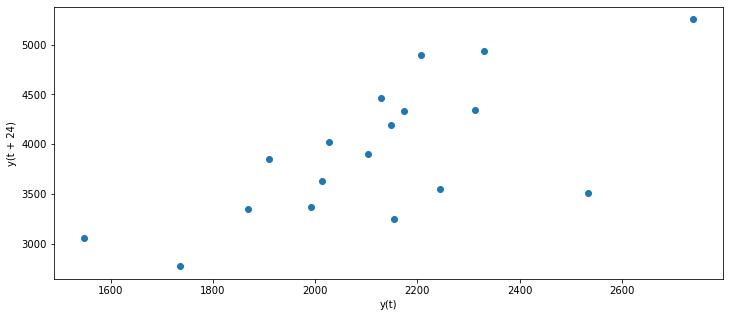

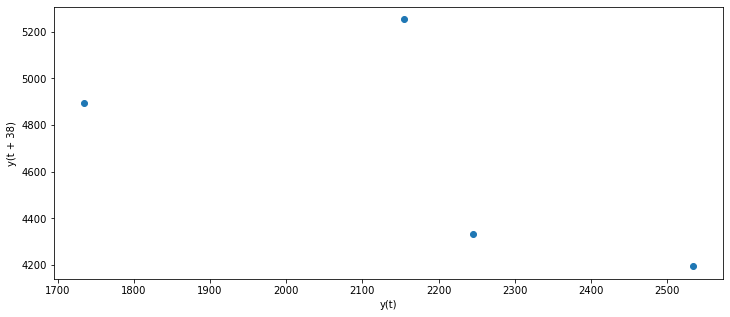

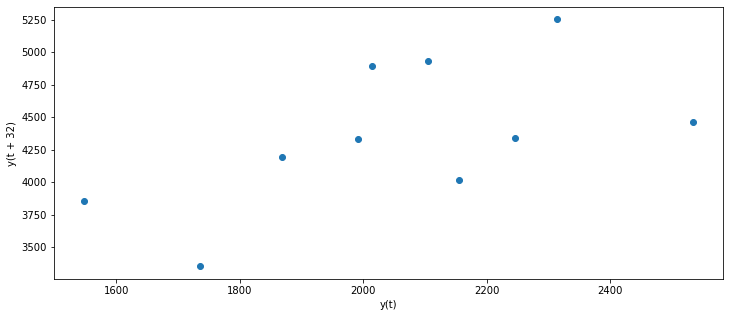

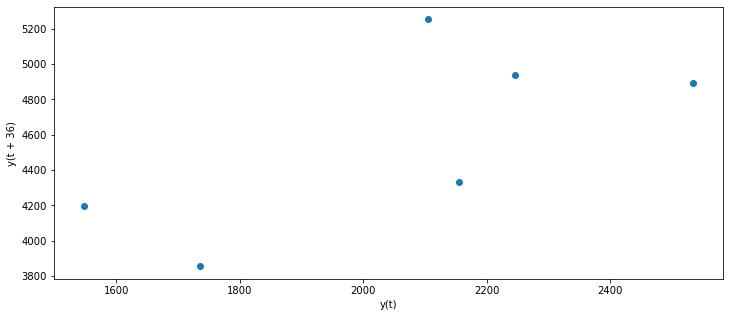

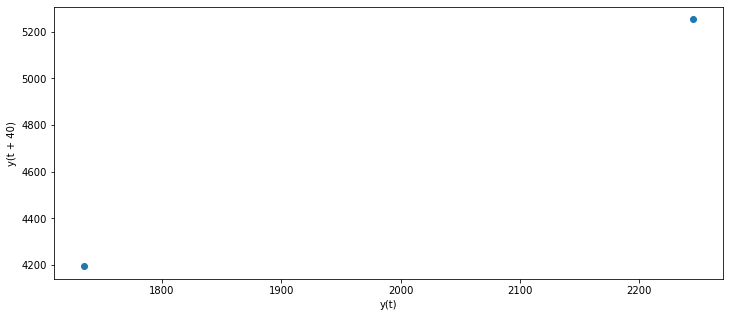

In [81]:
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    plt.figure(figsize=(12,5))
    lag_plot(data.Sales, lag=i);

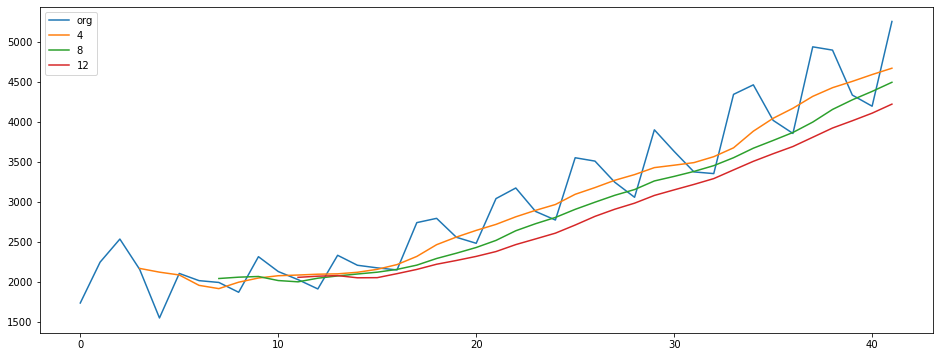

In [82]:
plt.figure(figsize=(16,6))
data.Sales.plot(label="org")
for i in range(4,13,4):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

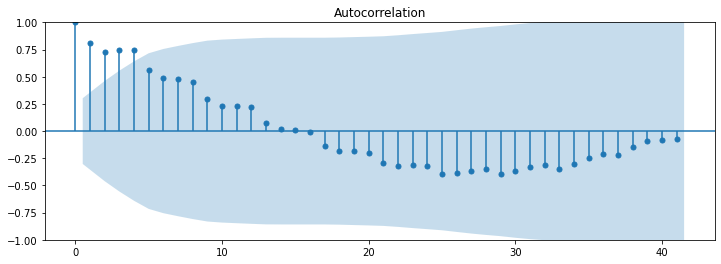

In [83]:
with plt.rc_context():
        plt.rc("figure", figsize=(12,4))
        tsa_plots.plot_acf(data.Sales,lags=41)

In [84]:
data1['t'] = np.arange(1,43)
data1['t_squared'] = data1['t']**2
data1["Sales_log"] =np.log(data1['Sales'])

In [85]:
data1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
Date,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,1,1,7.458663
1986-04-01,2244.960999,Q2,0,1,0,0,2,4,7.716443
1986-07-01,2533.804993,Q3,0,0,1,0,3,9,7.837477
1986-10-01,2154.962997,Q4,0,0,0,1,4,16,7.675529
1987-01-01,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [86]:
train =data1.head(32)
test =data1.tail(10)

# MODELS

In [87]:
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))

In [88]:
linear_rmse

752.9233932767111

In [89]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))

In [90]:
quad_rmse

457.7357355407393

In [91]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))

In [92]:
exp_rmse

4387.940544839098

In [93]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# ARIMA MODEL

In [94]:
dataframe = pd.read_csv("CocaCola_Sales_Rawdata.csv",header=0,index_col=0, parse_dates=True)


In [95]:
dataframe

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [96]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

TypeError: unhashable type: 'slice'

In [ ]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [ ]:
train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
train

In [ ]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)

In [ ]:
yhat, obs

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))

In [ ]:
rmse

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

# The least RMSE values has the RMSE_ARMIA model and we can final this model